## Laptop Price Prediction- Regression

<img src='https://rukminim2.flixcart.com/image/850/1000/kmuxevk0/laptop-accessories-combo/c/w/m/great-design-4-in-1-laptop-skin-pack-with-screen-guard-key-original-imagfnvat45hvhxn.jpeg?q=20&crop=false' >

project link: https://www.kaggle.com/datasets/mrsimple07/laptoppricepredictions

* Bu çalışmanın amacı, bir laptop modelinin fiyatını, model özelliklerinden oluşan bir regresyon modeli kullanarak tahmin etmektir. Veri seti, çeşitli laptop modellerinin teknik özelliklerini ve fiyatlarını içermektedir. Bağımsız değişkenler olarak; bellek hızı, cihaz ağırlığı, ekran boyutu, ekran kartı bellek tipi ve kapasitesi, ekran panel tipi, işlemci özellikleri, işletim sistemi, kart okuyucu, aydınlatma, maksimum işlemci hızı, ekran çözünürlüğü, parmak izi okuyucu, RAM kapasitesi ve SSD kapasitesi kullanılmıştır. Bağımlı değişken ise fiyattır.

Veri setindeki eksik verileri tamamlayıp  gerekli dönüşümler yapacağız. Ardından, regresyon modeli oluşturup, model performansı değerlendireceğiz. Sonuçlarda seçilen özelliklerden oluşan regresyon modelinin fiyat tahmininde yüksek doğruluk sağladığını göstermeyi hedefliyoruz. Elde edilen model, yeni laptop modellerinin fiyatlarını öngörmek için kullanılabilir.

# Data Dictionary

1. **Bellek Hızı**: Sistemin RAM bellek modüllerinin hızı, genellikle MHz cinsinden ifade edilir.
2. **Cihaz Ağırlığı**: Laptop'un ağırlığı, genellikle kilogram (kg) olarak belirtilir.
3. **Ekran Boyutu**: Ekranın fiziksel boyutu, genellikle inç cinsinden ifade edilir (örn. 15.6 inç).
4. **Ekran Kartı Bellek Tipi**: Laptop'un dahili ekran kartının bellek tipi, genellikle GDDR5, GDDR6 gibi ifade edilir.
5. **Ekran Kartı Hafızası**: Ekran kartının sahip olduğu bellek kapasitesi, genellikle GB cinsinden belirtilir.
6. **Ekran Kartı Tipi**: Laptop'un kullandığı ekran kartı modeli (örn. NVIDIA GeForce RTX 3060).
7. **Ekran Panel Tipi**: Ekranın panel teknolojisi, genellikle IPS, OLED, LCD gibi ifade edilir.
8. **İşlemci Nesli**: İşlemcinin üretildiği dönem, genellikle "10. nesil", "11. nesil" gibi gösterilir.
9. **İşlemci**: Laptop'un kullandığı işlemci modeli (örn. Intel Core i5-11400H).
10. **İşletim Sistemi**: Laptop'un yüklü olan işletim sistemi (Windows, macOS, Linux vb.).
11. **Kart Okuyucu**: Laptop'un sahip olduğu kart okuyucu özellikleri (SD, microSD, CF kart vb.).
12. **Aydınlatma**: Klavye aydınlatması veya diğer aydınlatma özellikleri.
13. **Maksimum İşlemci Hızı**: İşlemcinin en yüksek çalışma hızı, genellikle GHz cinsinden ifade edilir.
14. **Max Ekran Çözünürlüğü**: Ekranın desteklediği maksimum çözünürlük, genellikle piksel cinsinden belirtilir (örn. 1920x1080).
15. **Parmak İzi Okuyucu**: Laptop'un parmak izi okuma özelliği olup olmadığı.
16. **Ram (Sistem Belleği)**: Laptop'un sahip olduğu sistem belleği miktarı, genellikle GB cinsinden ifade edilir.
17. **SSD Kapasitesi**: Laptop'un sahip olduğu SSD (Solid State Drive) depolama kapasitesi, genellikle GB cinsinden belirtilir.
18. **Ürün Modeli**: Laptop'un model adı veya numarası.
19. **Fiyat**: Laptop'un satış fiyatı.


* Grekli paketlerin importu

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## EDA

In [2]:
df1=pd.read_excel('data.xlsx')

In [3]:
df1.sample(7)

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
955,NaN,1 - 2 kg,13 inç,NaN,NaN,NaN,IPS,NaN,Apple M2,macOS,NaN,0,NaN,2560 x 1600,NaN,8 GB,256 GB,Notebook,Yüksek
759,3200 MHz,2 kg ve Altı,14 inç,Onboard,Paylaşımlı,Dahili Ekran Kartı,IPS,5.Nesil,5625U,Yok (Free Dos),Yok,1,"4,3 GHz",1920 x 1080,Yok,16 GB,1 TB,Notebook,Düşük
694,4800 MHz,2 - 4 kg,17 inç,GDDR6,8 GB,Harici Ekran Kartı,TN,13.Nesil,13700HX,Windows 11 Pro,Var,1,"5,5 Ghz",2560 x 1600,Var,64 GB,2 TB,Notebook,Çok Yüksek
471,4800 MHz,2 - 4 kg,"16,1 inç",GDDR6,4 GB,Harici Ekran Kartı,IPS,12.Nesil,12500H,Yok (Free Dos),Var,1,"4,2 GHz",1920 x 1080,Yok,16 GB,512 GB,Oyun Bilgisayarları,Orta
748,3200 MHz,2 - 4 kg,"15,6 inç",NaN,NaN,NaN,WVA,5.Nesil,5500U,Windows 11 Home,NaN,0,"4,0 GHz",1920 x 1080,NaN,8 GB,256 GB,Notebook,Düşük
768,3200 MHz,1 - 2 kg,"15,6 inç",Onboard,Paylaşımlı,Dahili Ekran Kartı,TN,5.Nesil,5825U,Windows 11 Pro,Var,0,"4,5 GHz",1920 x 1080,Yok,24 GB,1 TB,Notebook,Düşük
481,4800 MHz,1 - 2 kg,"15,6 inç",GDDR6,6 GB,Yüksek Seviye Harici Ekran Kartı,TN,12.Nesil,12450H,Yok (Free Dos),Yok,1,"4,4 GHz",1920 x 1080,Yok,16 GB,1 TB,Oyun Bilgisayarları,Yüksek


In [4]:
df1.shape

(994, 19)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bellek Hızı              888 non-null    object
 1   Cihaz Ağırlığı           985 non-null    object
 2   Ekran Boyutu             994 non-null    object
 3   Ekran Kartı Bellek Tipi  884 non-null    object
 4   Ekran Kartı Hafızası     946 non-null    object
 5   Ekran Kartı Tipi         955 non-null    object
 6   Ekran Panel Tipi         994 non-null    object
 7   İşlemci Nesli            946 non-null    object
 8   İşlemci                  979 non-null    object
 9   İşletim Sistemi          994 non-null    object
 10  Kart Okuyucu             864 non-null    object
 11  Aydınlatma               994 non-null    int64 
 12  Maksimum İşlemci Hızı    950 non-null    object
 13  Max Ekran Çözünürlüğü    988 non-null    object
 14  Parmak İzi Okuyucu       886 non-null    o

In [6]:
df1.shape

(994, 19)

In [7]:
df1.isnull().sum()

Bellek Hızı                106
Cihaz Ağırlığı               9
Ekran Boyutu                 0
Ekran Kartı Bellek Tipi    110
Ekran Kartı Hafızası        48
Ekran Kartı Tipi            39
Ekran Panel Tipi             0
İşlemci Nesli               48
İşlemci                     15
İşletim Sistemi              0
Kart Okuyucu               130
Aydınlatma                   0
Maksimum İşlemci Hızı       44
Max Ekran Çözünürlüğü        6
Parmak İzi Okuyucu         108
Ram (Sistem Belleği)         7
SSD Kapasitesi               3
Ürün Modeli                  0
Fiyat                        0
dtype: int64

In [8]:
df2=pd.read_excel('test.xlsx')

In [9]:
df2.head()

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,3200 MHz,1 - 2 kg,"15,6 inç",GDDR6,6 GB,Yüksek Seviye Harici Ekran Kartı,TN,12.Nesil,12450H,Yok (Free Dos),Yok,1,"4,4 GHz",1920 x 1080,Yok,8 GB,512 GB,Oyun Bilgisayarları,Orta
1,3200 MHz,1 - 2 kg,"14,1 inç",Onboard,Paylaşımlı,Dahili Ekran Kartı,IPS,12.Nesil,1255U,Yok (Free Dos),Var,0,"4,7 GHz",1920 x 1080,Var,16 GB,512 GB,Notebook,Düşük
2,3200 MHz,1 - 2 kg,"15,6 inç",Onboard,Paylaşımlı,Dahili Ekran Kartı,TN,Ryzen,5700U,Yok (Free Dos),Var,0,"4,3 GHz",1920 x 1080,Yok,8 GB,512 GB,Notebook,Çok Düşük
3,3200 MHz,1 - 2 kg,"15,6 inç",Onboard,Paylaşımlı,Dahili Ekran Kartı,IPS,12.Nesil,1255U,Windows 10 Pro,Var,0,"4,7 GHz",1920 x 1080,Yok,8 GB,2 TB,Notebook,Orta
4,2400 MHz,1 - 2 kg,"15,6 inç",Onboard,Paylaşımlı,Dahili Ekran Kartı,TN,İntel N Serisi,N4120,Yok (Free Dos),Var,0,"2,6 GHz",1366 x 768,Yok,4 GB,0 GB,Notebook,Çok Düşük


In [10]:
df= pd.concat([df1, df2], ignore_index=True)

In [11]:
df.head()

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Çok Yüksek
1,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Çok Yüksek
2,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Orta
3,3200 MHz,1 - 2 kg,"15,6 inç",GDDR4,2 GB,Harici Ekran Kartı,LED,10. Nesil,1035G1,Windows 10 Home,Var,0,"3,6 GHz",1920 x 1080,Yok,8 GB,512 GB,Notebook,Düşük
4,3200 MHz,1 - 2 kg,"15,6 inç",GDDR5,2 GB,Harici Ekran Kartı,LED,10. Nesil,1035G1,Windows 10 Home,Yok,0,"3,6 GHz",1920 x 1080,Yok,12 GB,1 TB,Notebook,Düşük


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bellek Hızı              1137 non-null   object
 1   Cihaz Ağırlığı           1234 non-null   object
 2   Ekran Boyutu             1243 non-null   object
 3   Ekran Kartı Bellek Tipi  1133 non-null   object
 4   Ekran Kartı Hafızası     1195 non-null   object
 5   Ekran Kartı Tipi         1204 non-null   object
 6   Ekran Panel Tipi         1243 non-null   object
 7   İşlemci Nesli            1195 non-null   object
 8   İşlemci                  1228 non-null   object
 9   İşletim Sistemi          1243 non-null   object
 10  Kart Okuyucu             1113 non-null   object
 11  Aydınlatma               1243 non-null   int64 
 12  Maksimum İşlemci Hızı    1199 non-null   object
 13  Max Ekran Çözünürlüğü    1237 non-null   object
 14  Parmak İzi Okuyucu       1135 non-null  

In [13]:
df.isnull().sum()

Bellek Hızı                106
Cihaz Ağırlığı               9
Ekran Boyutu                 0
Ekran Kartı Bellek Tipi    110
Ekran Kartı Hafızası        48
Ekran Kartı Tipi            39
Ekran Panel Tipi             0
İşlemci Nesli               48
İşlemci                     15
İşletim Sistemi              0
Kart Okuyucu               130
Aydınlatma                   0
Maksimum İşlemci Hızı       44
Max Ekran Çözünürlüğü        6
Parmak İzi Okuyucu         108
Ram (Sistem Belleği)         7
SSD Kapasitesi               3
Ürün Modeli                  0
Fiyat                        0
dtype: int64

In [14]:
df['Bellek Hızı'].value_counts()

Bellek Hızı
3200 MHz    836
4800 MHz    139
2666 MHz     84
2933 MHz     20
2400 MHz     20
5200 MHz      9
4266 MHz      7
4267 MHz      6
1066 MHz      3
3000 MHz      3
3733 MHz      2
6400 MHz      2
5500 MHz      2
2133 MHz      2
1600 MHz      1
1866 MHz      1
Name: count, dtype: int64

In [15]:
# "Bellek Hızı" sütunundaki "MHz" ifadesini kaldırma
df["Bellek Hızı"] = df["Bellek Hızı"].str.replace("MHz", "")

In [16]:
# "Bellek Hızı" sütunundaki değerleri float'a dönüştürme
df["Bellek Hızı"] = df["Bellek Hızı"].astype(float)

In [17]:
df['Bellek Hızı'].fillna(df['Bellek Hızı'].mean(), inplace=True)

In [18]:
df['Ekran Boyutu'].value_counts()

Ekran Boyutu
15,6 inç    855
14 inç      162
16 inç       47
17,3 inç     46
16,1 inç     44
14,1 inç     35
13 inç       20
13,3 inç     15
10 inç        3
18,4 inç      3
13,4 inç      2
13,5 inç      2
15 inç        2
11,6 inç      2
17 inç        2
18 inç        2
12,3 inç      1
Name: count, dtype: int64

import plotly.graph_objects as go

fig = px.sunburst(df, path=['Ürün Modeli','Fiyat','Ekran Kartı Tipi'], values='İşletim Sistemi')

# Grafiğin boyutunu ayarla
fig.update_layout(
    autosize=False,
    width=900,
    height=800
)

fig.show()

In [19]:
# Convert the 'Ekran Boyutu' column to strings
df['Ekran Boyutu'] = df['Ekran Boyutu'].astype(str)

# Apply the string operations
df['Ekran Boyutu'] = df['Ekran Boyutu'].str.replace(' inç', '').str.replace(',', '.').astype(float)

In [20]:
df['Ekran Kartı Bellek Tipi'].value_counts()

Ekran Kartı Bellek Tipi
Onboard    648
GDDR6      399
GDDR5       59
GDDR4       14
DDR5         8
GDDR6X       3
DDR3         2
Name: count, dtype: int64

In [21]:
d = {'Onboard': 0, 'GDDR6': 1, 'GDDR5': 2, 'GDDR4': 3, 'DDR5': 4, 'GDDR6X': 5, 'DDR3': 6}
df['Ekran Kartı Bellek Tipi'] = df['Ekran Kartı Bellek Tipi'].map(d)

In [22]:
df['Ekran Kartı Bellek Tipi']=df['Ekran Kartı Bellek Tipi'].fillna(df['Ekran Kartı Bellek Tipi'].mean())

In [23]:
df['Ekran Kartı Tipi'].value_counts()

Ekran Kartı Tipi
Dahili Ekran Kartı                  724
Yüksek Seviye Harici Ekran Kartı    242
Harici Ekran Kartı                  238
Name: count, dtype: int64

In [24]:
d={'Dahili Ekran Kartı':0,'Harici Ekran Kartı':1,'Yüksek Seviye Harici Ekran Kartı':2}

In [25]:
df['Ekran Kartı Tipi']=df['Ekran Kartı Tipi'].map(d)

In [26]:
df['Ekran Kartı Tipi']=df['Ekran Kartı Tipi'].fillna(df['Ekran Kartı Tipi'].mean())

In [27]:
df['İşlemci'] = df['İşlemci'].astype(str)
df['İşlemci'] = df['İşlemci'].str.extract('(\d+)', expand=False).astype(float)
df['İşlemci'].fillna(df['İşlemci'].mean(), inplace=True)

In [28]:
d={'Yok':0,'Var':1,}
df['Kart Okuyucu']=df['Kart Okuyucu'].map(d)
df['Kart Okuyucu']=df['Kart Okuyucu'].fillna(df['Kart Okuyucu'].mean())

In [29]:
d={'0 GB':0,' 0':1,'64 GB':2,'120 GB':3,'128 GB':4,'250 GB':5,'256 GB':6,'500 GB':7,'512 GB':8,'1 TB':9,'2 TB':10,'4 TB':11,}
df['SSD Kapasitesi']=df['SSD Kapasitesi'].map(d)
df['SSD Kapasitesi']=df['SSD Kapasitesi'].fillna(df['SSD Kapasitesi'].mean())

In [30]:
df['Ekran Kartı Hafızası'].value_counts()

Ekran Kartı Hafızası
Paylaşımlı    721
4 GB          208
2 GB           97
6 GB           93
8 GB           56
16 GB          11
12 GB           6
1 GB            3
Name: count, dtype: int64

In [31]:
d = {'1 GB':0, '2':1, '4 GB':2, '6 GB':3, '8 GB':4, '12 GB':5, '16 GB':6}
df['Ekran Kartı Hafızası'] = df['Ekran Kartı Hafızası'].map(d)

In [32]:
df['Ekran Kartı Hafızası']=df['Ekran Kartı Hafızası'].fillna(df['Ekran Kartı Hafızası'].mean())

In [33]:
df['Parmak İzi Okuyucu'].value_counts()

Parmak İzi Okuyucu
Yok    885
Var    250
Name: count, dtype: int64

In [34]:
d = {'Yok':0, 'Var':1}
df['Parmak İzi Okuyucu'] = df['Parmak İzi Okuyucu'].map(d)

In [35]:
df['Parmak İzi Okuyucu']=df['Parmak İzi Okuyucu'].fillna(df['Parmak İzi Okuyucu'].mean())

In [36]:
df['Ram (Sistem Belleği)'].value_counts()
#bu sutunda 2 tane 8 gb var, onun birini değiştiryorum

Ram (Sistem Belleği)
16 GB     531
8 GB      349
32 GB     194
4 GB       57
12 GB      33
64 GB      30
24 GB      23
20 GB       7
40 GB       7
36 GB       3
8 GB        1
128 GB      1
Name: count, dtype: int64

In [37]:
df.loc[df.index[-1], 'Ram (Sistem Belleği)'] = '9 GB'

In [38]:
df['Ram (Sistem Belleği)'].value_counts()

Ram (Sistem Belleği)
16 GB     530
8 GB      349
32 GB     194
4 GB       57
12 GB      33
64 GB      30
24 GB      23
20 GB       7
40 GB       7
36 GB       3
8 GB        1
128 GB      1
9 GB        1
Name: count, dtype: int64

In [39]:
# Varsayalım veri 'data' adlı bir DataFrame'de
d = {'16 GB':0, '8 GB':1, '32 GB':2, '4 GB':3, '12 GB':4, '64 GB':5, '24 GB':6, '20 GB':7, '40 GB':8, '36 GB':9, '8 GB':10, '128 GB':11, '9 GB':12}

# Sütun adındaki değerleri sayılara dönüştürme
df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].map(d)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bellek Hızı              1243 non-null   float64
 1   Cihaz Ağırlığı           1234 non-null   object 
 2   Ekran Boyutu             1243 non-null   float64
 3   Ekran Kartı Bellek Tipi  1243 non-null   float64
 4   Ekran Kartı Hafızası     1243 non-null   float64
 5   Ekran Kartı Tipi         1243 non-null   float64
 6   Ekran Panel Tipi         1243 non-null   object 
 7   İşlemci Nesli            1195 non-null   object 
 8   İşlemci                  1243 non-null   float64
 9   İşletim Sistemi          1243 non-null   object 
 10  Kart Okuyucu             1243 non-null   float64
 11  Aydınlatma               1243 non-null   int64  
 12  Maksimum İşlemci Hızı    1199 non-null   object 
 13  Max Ekran Çözünürlüğü    1237 non-null   object 
 14  Parmak İzi Okuyucu      

In [41]:
df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].fillna(0)

df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].astype(int)

In [42]:
d={'Android':0,'Windows 10 Home':1,'Yok (Free Dos)':2,'Windows 11 Home':3,'Windows 10 Pro':4,'Windows 11 Pro':5,'macOS':6,'Chrome OS':7,'Ubuntu':8,}

In [43]:
df['İşletim Sistemi']=df['İşletim Sistemi'].map(d)

In [44]:
d={'Notebook':0,'Oyun Bilgisayarları':1,'İkisi Bir Arada':2,'Ultrabook':3,}

In [45]:
df['Ürün Modeli']=df['Ürün Modeli'].map(d)

In [46]:
d = {'IPS': 0, 'TN': 1, 'WVA': 2, 'LED': 3, 'OLED': 4, 'Liquid Retina XDR': 5, 'SVA': 6, 'LTPS': 7, 'Mini LED': 8, 'Liquid Retina Ekran': 9}
df['Ekran Panel Tipi'] = df['Ekran Panel Tipi'].map(d)

In [47]:
d={'Çok Düşük':0,'Düşük':1,'Orta':2,'Yüksek':3,'Yüksek':4,}

In [48]:
df['Fiyat']=df['Fiyat'].map(d)

* silinen sutunlar

In [49]:
del df['Cihaz Ağırlığı']

In [50]:
del df['İşlemci Nesli']
#işlemci sutunu yeterli olduğ u için bu sutunu sildim

In [51]:
del df['Maksimum İşlemci Hızı']

In [52]:
del df['Max Ekran Çözünürlüğü']

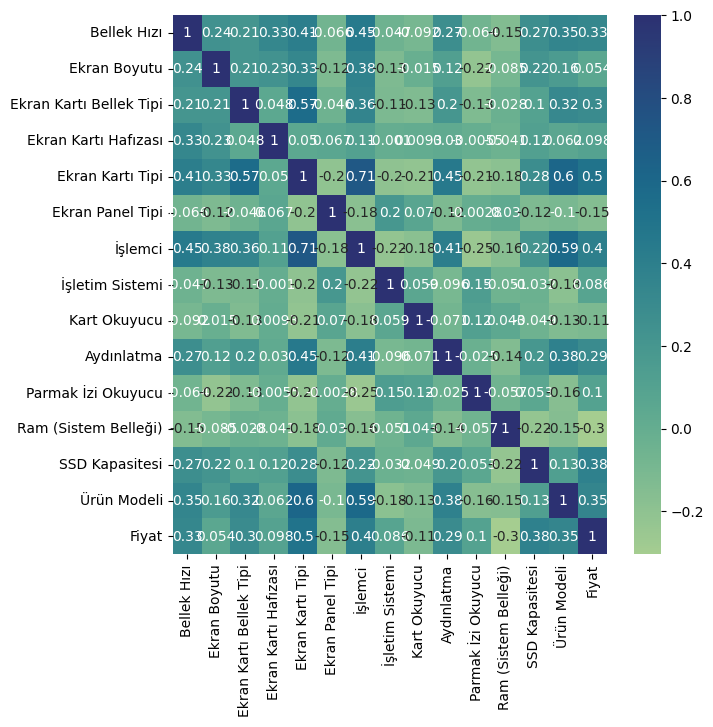

In [53]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest');

In [54]:
abs(df.corr(numeric_only=True)['Fiyat']).sort_values(ascending=True)

Ekran Boyutu               0.054146
İşletim Sistemi            0.086387
Ekran Kartı Hafızası       0.098110
Parmak İzi Okuyucu         0.103182
Kart Okuyucu               0.111207
Ekran Panel Tipi           0.150037
Aydınlatma                 0.292057
Ekran Kartı Bellek Tipi    0.301223
Ram (Sistem Belleği)       0.303966
Bellek Hızı                0.334258
Ürün Modeli                0.347461
SSD Kapasitesi             0.379729
İşlemci                    0.400036
Ekran Kartı Tipi           0.504449
Fiyat                      1.000000
Name: Fiyat, dtype: float64

In [55]:
df.head()

,Bellek Hızı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0,NaN
1,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0,NaN
2,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0,2.0
3,3200.0,15.6,3.000000,2.692308,1.000000,3,1035.0,1,1.000000,0,0.000000,10.0,8.0,0,1.0
4,3200.0,15.6,2.000000,2.692308,1.000000,3,1035.0,1,0.000000,0,0.000000,4.0,9.0,0,1.0


<Axes: xlabel='İşlemci', ylabel='Density'>

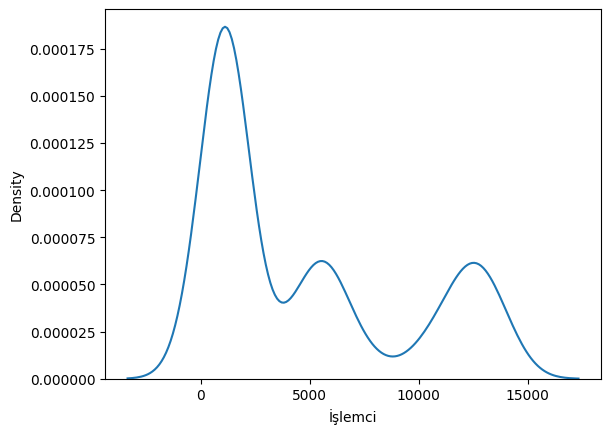

In [56]:
sns.kdeplot(x=df['İşlemci'])
#data sağa doğru kaymış mı emin değilim,bence çok kaymamış,kesmesem de olur

<Axes: xlabel='Ekran Kartı Tipi', ylabel='Density'>

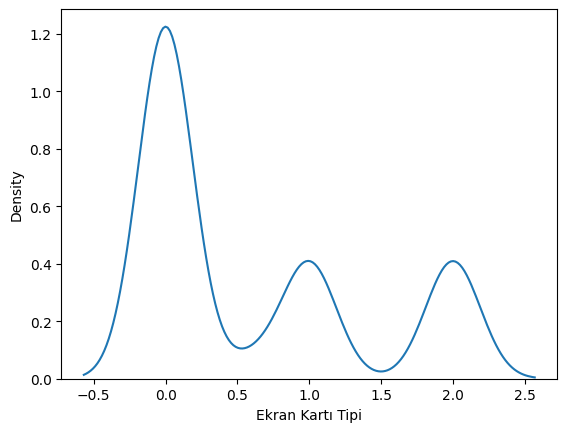

In [57]:
sns.kdeplot(x=df['Ekran Kartı Tipi'])

<Axes: xlabel='Kart Okuyucu', ylabel='Density'>

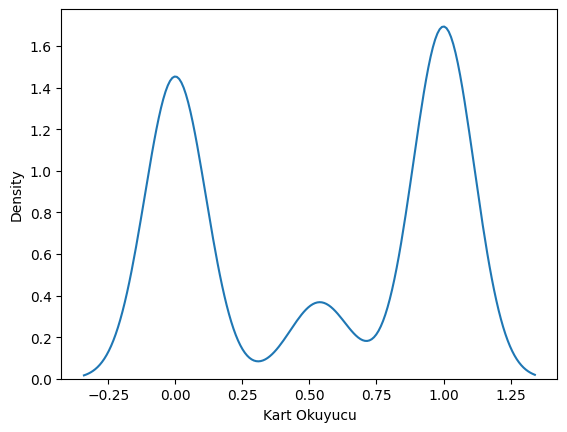

In [58]:
sns.kdeplot(x=df['Kart Okuyucu'])

<Axes: xlabel='Ram (Sistem Belleği)', ylabel='Density'>

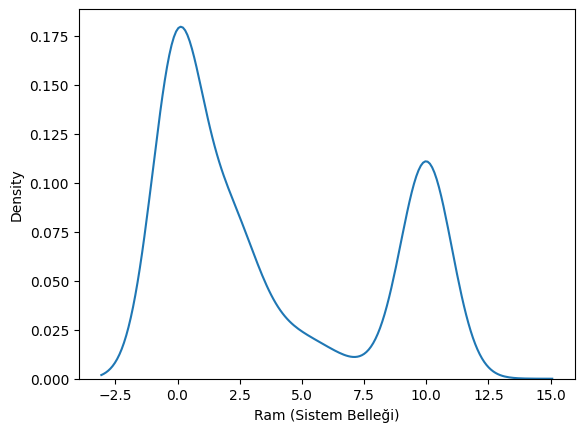

In [59]:
sns.kdeplot(x=df['Ram (Sistem Belleği)'])

<Axes: xlabel='Ürün Modeli', ylabel='Density'>

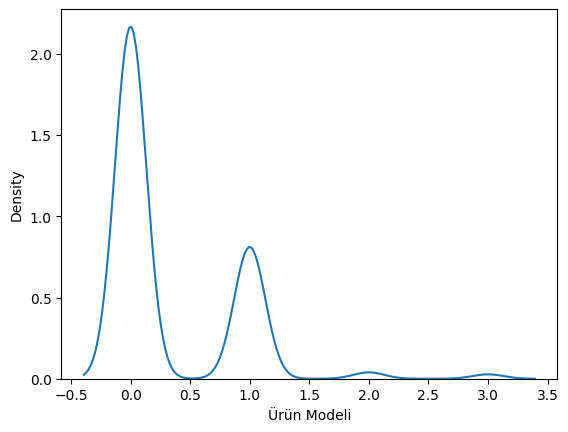

In [60]:
sns.kdeplot(x=df['Ürün Modeli'])

# Feature engineering

In [61]:
df.columns

Index(['Bellek Hızı', 'Ekran Boyutu', 'Ekran Kartı Bellek Tipi',
       'Ekran Kartı Hafızası', 'Ekran Kartı Tipi', 'Ekran Panel Tipi',
       'İşlemci', 'İşletim Sistemi', 'Kart Okuyucu', 'Aydınlatma',
       'Parmak İzi Okuyucu', 'Ram (Sistem Belleği)', 'SSD Kapasitesi',
       'Ürün Modeli', 'Fiyat'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bellek Hızı              1243 non-null   float64
 1   Ekran Boyutu             1243 non-null   float64
 2   Ekran Kartı Bellek Tipi  1243 non-null   float64
 3   Ekran Kartı Hafızası     1243 non-null   float64
 4   Ekran Kartı Tipi         1243 non-null   float64
 5   Ekran Panel Tipi         1243 non-null   int64  
 6   İşlemci                  1243 non-null   float64
 7   İşletim Sistemi          1243 non-null   int64  
 8   Kart Okuyucu             1243 non-null   float64
 9   Aydınlatma               1243 non-null   int64  
 10  Parmak İzi Okuyucu       1243 non-null   float64
 11  Ram (Sistem Belleği)     1243 non-null   float64
 12  SSD Kapasitesi           1243 non-null   float64
 13  Ürün Modeli              1243 non-null   int64  
 14  Fiyat                   

In [63]:
df.isnull().sum()

Bellek Hızı                  0
Ekran Boyutu                 0
Ekran Kartı Bellek Tipi      0
Ekran Kartı Hafızası         0
Ekran Kartı Tipi             0
Ekran Panel Tipi             0
İşlemci                      0
İşletim Sistemi              0
Kart Okuyucu                 0
Aydınlatma                   0
Parmak İzi Okuyucu           0
Ram (Sistem Belleği)         0
SSD Kapasitesi               0
Ürün Modeli                  0
Fiyat                      117
dtype: int64

# Scaling - Normalization

In [65]:
from sklearn.preprocessing import normalize, scale

In [66]:
df['Fiyat'] = df['Fiyat'].fillna(0)

In [67]:
df.sample(5)

,Bellek Hızı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
666,3200.0,15.6,1.0,3.000000,1.0,0,13700.0,3,1.0,1,0.0,2.0,9.0,1,4.0
186,3200.0,14.0,0.0,2.692308,0.0,1,1115.0,2,0.0,0,0.0,4.0,8.0,0,0.0
1211,3200.0,15.6,1.0,2.000000,0.0,0,5600.0,2,1.0,0,0.0,0.0,9.0,0,1.0
976,2666.0,15.6,0.0,2.692308,0.0,1,5030.0,3,0.0,0,0.0,3.0,3.0,0,0.0
134,3200.0,15.6,1.0,2.000000,2.0,0,10300.0,2,1.0,0,0.0,10.0,8.0,1,1.0


In [69]:
x=df.drop('Fiyat', axis=1)

In [70]:
x.head()

,Bellek Hızı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli
0,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0
1,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0
2,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0
3,3200.0,15.6,3.000000,2.692308,1.000000,3,1035.0,1,1.000000,0,0.000000,10.0,8.0,0
4,3200.0,15.6,2.000000,2.692308,1.000000,3,1035.0,1,0.000000,0,0.000000,4.0,9.0,0


In [71]:
yenix=scale(x)

In [72]:
pd.DataFrame(x)
#tüm data birim oldu, hiç birinin üstünlüğü yok

,Bellek Hızı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli
0,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0
1,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0
2,1066.0,10.0,0.545455,0.000000,0.599668,0,1000.0,0,0.538185,0,0.220264,0.0,9.0,0
3,3200.0,15.6,3.000000,2.692308,1.000000,3,1035.0,1,1.000000,0,0.000000,10.0,8.0,0
4,3200.0,15.6,2.000000,2.692308,1.000000,3,1035.0,1,0.000000,0,0.000000,4.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,3200.0,14.0,0.000000,2.692308,0.000000,0,1135.0,3,1.000000,0,0.000000,0.0,8.0,0
1239,3200.0,15.6,0.000000,2.692308,0.000000,0,1235.0,2,1.000000,0,1.000000,10.0,7.0,0
1240,2666.0,15.6,0.000000,2.692308,0.000000,1,4600.0,2,0.000000,0,0.000000,6.0,9.0,0
1241,3200.0,15.6,0.000000,2.692308,0.000000,0,1235.0,2,1.000000,0,1.000000,2.0,9.0,0


In [74]:
normalizeddata=normalize(x)

In [75]:
pd.DataFrame(normalizeddata)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.729293,0.006841,0.000373,0.000000,0.000410,0.000000,0.684140,0.000000,0.000368,0.0,0.000151,0.000000,0.006157,0.0
1,0.729293,0.006841,0.000373,0.000000,0.000410,0.000000,0.684140,0.000000,0.000368,0.0,0.000151,0.000000,0.006157,0.0
2,0.729293,0.006841,0.000373,0.000000,0.000410,0.000000,0.684140,0.000000,0.000368,0.0,0.000151,0.000000,0.006157,0.0
3,0.951452,0.004638,0.000892,0.000801,0.000297,0.000892,0.307735,0.000297,0.000297,0.0,0.000000,0.002973,0.002379,0.0
4,0.951455,0.004638,0.000595,0.000801,0.000297,0.000892,0.307736,0.000297,0.000000,0.0,0.000000,0.001189,0.002676,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0.942461,0.004123,0.000000,0.000793,0.000000,0.000000,0.334279,0.000884,0.000295,0.0,0.000000,0.000000,0.002356,0.0
1239,0.932916,0.004548,0.000000,0.000785,0.000000,0.000000,0.360047,0.000583,0.000292,0.0,0.000292,0.002915,0.002041,0.0
1240,0.501433,0.002934,0.000000,0.000506,0.000000,0.000188,0.865189,0.000376,0.000000,0.0,0.000000,0.001129,0.001693,0.0
1241,0.932918,0.004548,0.000000,0.000785,0.000000,0.000000,0.360048,0.000583,0.000292,0.0,0.000292,0.000583,0.002624,0.0


In [84]:
import pickle

In [85]:
with open('cleaned_df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [76]:
df.columns

Index(['Bellek Hızı', 'Ekran Boyutu', 'Ekran Kartı Bellek Tipi',
       'Ekran Kartı Hafızası', 'Ekran Kartı Tipi', 'Ekran Panel Tipi',
       'İşlemci', 'İşletim Sistemi', 'Kart Okuyucu', 'Aydınlatma',
       'Parmak İzi Okuyucu', 'Ram (Sistem Belleği)', 'SSD Kapasitesi',
       'Ürün Modeli', 'Fiyat'],
      dtype='object')

In [78]:
x = pd.DataFrame(normalizeddata)
y = df[['Fiyat']]

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [80]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.554823,0.712940,0.370461
Gradient Boosting,0.500490,0.755194,0.507972
AdaBoost,0.357574,0.856443,0.501205
Extra Tree,0.331685,0.873529,0.369478
Decision Tree,0.226162,0.939965,0.425703
KNeighborsRegressor,0.224120,0.941204,0.711916
Linear,0.213449,0.947654,0.670546
mlp_regressor,0.043537,1.045010,0.756081
Ridge,0.028775,1.053044,0.766072
SVR,0.015780,1.060066,0.687512


In [82]:
import pickle
# Pickle dosyasına kaydetme
GBR = GradientBoostingRegressor()
model = GBR.fit(x,y)
pickle.dump(model, open('fiyat tahmin.pkl', 'wb'))

In [83]:
 # MODELİ TEST
df2 = df

# Define X_test and y_test
x_test = df2.drop(['Fiyat'], axis=1)
y_test = df2['Fiyat']

# Read the pickle file
model = pickle.load(open('fiyat tahmin.pkl', 'rb'))

# Use the model to make predictions
predictions = model.predict(x_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)

# Print the results
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared: -0.2560868947764605
Mean Squared Error (MSE): 1.6175674826455253
Root Mean Squared Error (RMSE): 1.2718362640865077
Mean Absolute Error (MAE): 1.0226309466403056


In [86]:
#pip install TensorFlow

In [87]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [88]:
df3=pd.read_pickle('cleaned_df.pkl')

In [89]:
x=df3.drop('Fiyat',axis=1) 
y=df3[['Fiyat']]

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [91]:
model = Sequential()
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1)) # 5 çıktı nöronu
model.compile(loss='mse', optimizer='adam')

In [92]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2406.3135 - val_loss: 40.9110
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.3131 - val_loss: 28.1651
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.4198 - val_loss: 2.7637
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5814 - val_loss: 3.0516
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0799 - val_loss: 3.2486
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0230 - val_loss: 3.9162
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5212 - val_loss: 2.2406
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5983 - val_loss: 2.1286
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3357 - val_loss: 4.4091
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1031 - val_loss: 2.6433
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1627 - val_loss: 30.8021
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [93]:
tahmin=model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
r2_score(y_test,tahmin)

-0.681249453719659

In [96]:
mean_squared_error(y_test,tahmin)**.5

1.3854877402080163

In [ ]:
* Deep learningle r2 %68 üstüne çıkamadı,model başarısız oldu